# Inital Data Exploration
### Movella Dot

#### data is located in ../data/raw_data/flight/exp1/dot/ shoes/barefoot/ parabola_code
#### coding:
shoes / barefoot = s / b - walk/run/jump w/r/j - paraboloa number
e.g sw5 = shoes walk 5

sw2-5, sr6-9 sj10-12
bw16-19 br20-23 bj24-26

In [65]:
import pandas as pd
import numpy as np
import glob # read in files
import matplotlib.pyplot as plt

g = 9.80665

In [73]:
base = "../data/raw_data/"
env = "flight" #baseline
sensor = "dot"
exp = 1
s_p_code = 2
b_p_code = 18 

activity = "w" # w r j for walk run jump

# parabola codes
s_code = f"s{activity}{str(s_p_code)}"
b_code = f"b{activity}{str(b_p_code)}"

print(s_code, b_code)

sw2 bw16


In [74]:
## read in left and right

s_data_path = f"{base}{env}/exp{exp}/{sensor}/shoes/{s_code}/*.csv"
b_data_path = f"{base}{env}/exp{exp}/{sensor}/barefoot/{b_code}/*.csv"

# data paths shoes and barefoot
s_l_data = ""
s_r_data = ""
b_l_data = ""
b_r_data = ""


dfs = [] # holds shoe l/r and barefoot l/r data frames
for file_path in glob.glob(s_data_path):
    file_parts = file_path.split("_")
    if "Left" in file_parts:
        s_l_data = file_path
        dfs.append(pd.read_csv(s_l_data))
    else:
        s_r_data = file_path
        dfs.append(pd.read_csv(s_r_data))

for file_path in glob.glob(b_data_path):
    file_parts = file_path.split("_")
    if "Left" in file_parts:
        b_l_data = file_path
        dfs.append(pd.read_csv(b_l_data))
    else:
        b_r_data = file_path
        dfs.append(pd.read_csv(b_r_data))

In [71]:
 def vector_magnitude(*args):
    n = len(args[0])
    assert all(len(x) == n for x in args), "Vectors have different lengths"
    vm = np.sqrt(sum(x ** 2 for x in args))
    return vm

accel_lists = []

for df in dfs:
    a_list = [] # pc, x, y, z, mag lists
    a_list.append(df["PacketCounter"])
    a_list.append(df["Acc_X"].to_numpy()/ g)
    a_list.append(df["Acc_Y"].to_numpy()/ g)
    a_list.append(df["Acc_Z"].to_numpy()/ g)
    a_list.append(vector_magnitude(df["Acc_X"].to_numpy()/ g, df["Acc_Y"].to_numpy()/ g, df["Acc_Z"].to_numpy()/ g))

    accel_lists.append(a_list)

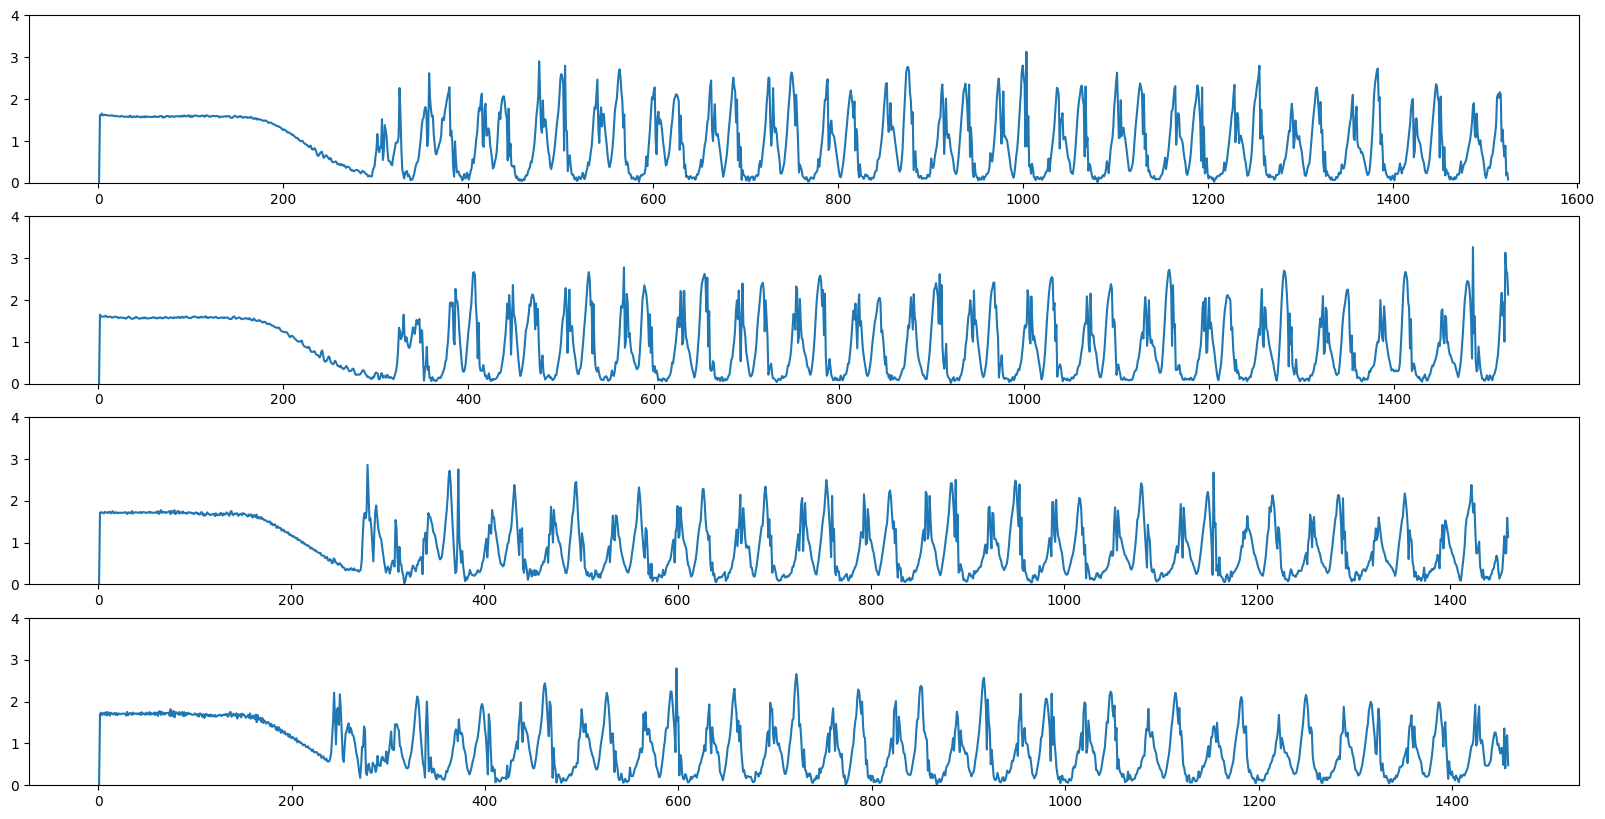

In [75]:
## plot the acceleration

# simple graphs
fig, ax = plt.subplots(4,1, figsize=(20, 10))

for idx, a in enumerate(accel_lists):
    ax[idx].plot(a[0],a[4])
    ax[idx].set_ylim(0,4)